# Predict Breast Cancer
In this assignment, the goal is to predict if someone has cancer or not. To do this, I will build a binary classifier with the logistic regression model. 

The 10 features in the dataset are from images taken from breast samples. These contain biological attributes of the cancer cell nuclei.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### read the data

In [2]:
df= pd.read_csv('data/cancer.data', header=None, index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


### rename the columns for readability

In [3]:
df= df.rename(columns={1:'clump_thickness', 2:'uniformity_of_cell_size', 3:'uniformity_of_cell_shape',
                  4:'marginal_adhesion', 5:'single_epithelial_cell_size',6:'bare_nuclei',
                   7:'bland_chromatin', 8: 'normal_nucleoli', 9:'mitoses',
                   10:'class'})
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


From the basic information of the data seen above;

* 699 entries
* 10 columns
* 1 type object column and 9 int64.

###  bare  nuclei (object type)
bare nuclei is of an object type instead of an integer. It is worth looking into why it is so. What kind of entries does it have? As strings would have to be preprocessed differently compared to integers.

In [5]:
df['bare_nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

16 '?'s spotted in the column. This is a sign of missing values. 

Since there are only 10 possible values, I will replace the missing values with the most common occuring digit. In this case it is 1.

Thereafter since all the values would be numbers, change the column type from object to integer.



In [6]:
most_common=df['bare_nuclei'].value_counts().index[0]
df['bare_nuclei']= df['bare_nuclei'].replace('?', most_common).astype('int64')

df['bare_nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

### descriptive statistics

In [7]:
df.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Looking at the basic stats presented above, all the values range from 1-10 so there are no strange out of bound entries.

## Split the features from the target variable

In [8]:
X= df.drop('class', axis=1)
y=df['class']

print(f'the features take on the shape {X.shape}')
print(f'the target takes on the shape {y.shape}')

the features take on the shape (699, 9)
the target takes on the shape (699,)


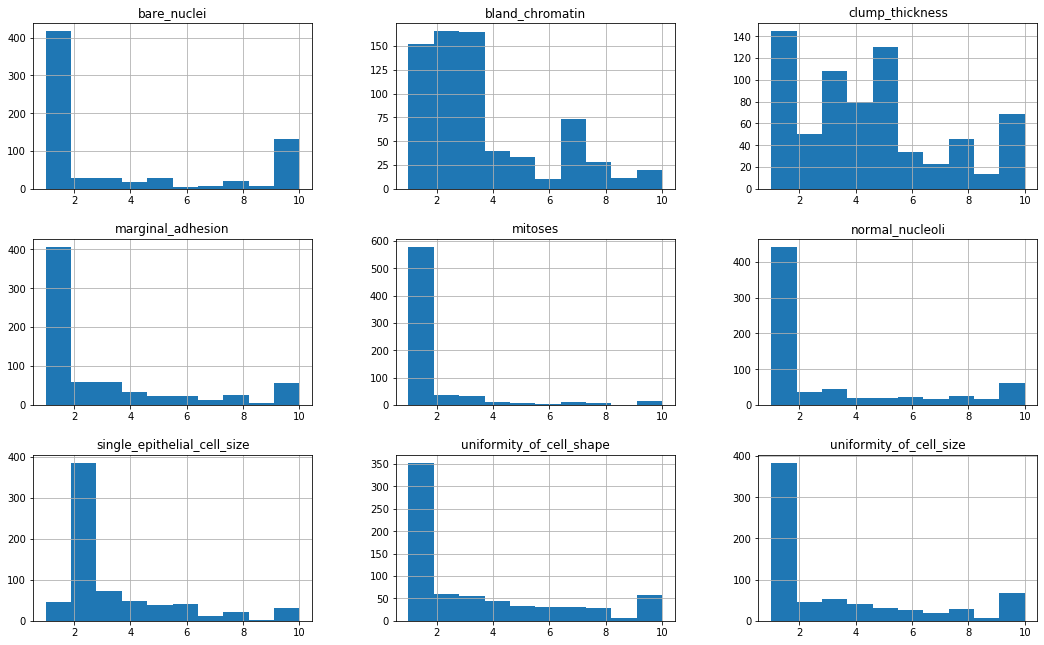

In [9]:
X.hist(figsize=(18,11))
plt.show()

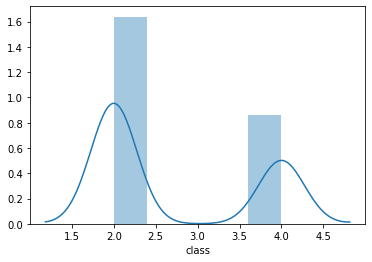

In [10]:
sns.distplot(y)

In [11]:
y.mean()

2.6895565092989986

Looking at most of the features, we see that they for the most part are skewed to the left and none of them have a normal distribution.

## count of target variables
* 0: benign (good)
* 1: malignant (bad)

In [12]:
digit_to_binary={
    2:0,
    4:1
}

y= y.map(digit_to_binary)


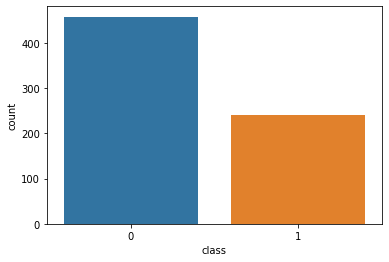

In [13]:
sns.countplot(y)

# Correlation

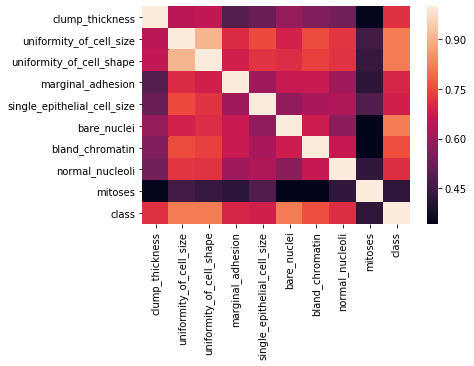

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
uniformity_of_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
uniformity_of_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


### split the data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

## base model

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

y_preds= log_reg.predict(X_test)

/home/masai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

print('Perfomance of base model:')

print(confusion_matrix(y_preds, y_test))
print('')

print(f'accuracy: {accuracy_score(y_test, y_preds)}')
print(f'recall: {recall_score( y_preds, y_test)}')
print(f'f1 score: {f1_score( y_preds, y_test)}')

Perfomance of base model:
[[141   5]
 [  2  62]]

accuracy: 0.9666666666666667
recall: 0.96875
f1 score: 0.9465648854961832


Straight of the bat, the model has an accuracy of almost 97%. This is really impressive, given the very little amount of preprocessing done.
Hopefully this is not by random chance. Below we will check how significant the features are towards prediciting the correct class.

# statistical significance of features
I will use the p-value of each feature to measure it's importance towards building the model

In [19]:
import statsmodels.api as sm
stats_log_reg= sm.Logit(y_train, X_train)
result= stats_log_reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.374565
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  489
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:                  0.4246
Time:                        14:47:48   Log-Likelihood:                -183.16
converged:                       True   LL-Null:                       -318.33
Covariance Type:            nonrobust   LLR p-value:                 8.354e-54
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clump_thickness                -0.3973      0.070     -5.649      0.000      -0.535      -0.259
uniformity_of_cell_size         0.8419      0.159      5.288      0.000       0.530       1.154
uniformity_of_cell_shape        0.2573      0.141      1.819      0.069      -0.020       0.534
marginal_adhesion              -0.0124      0.087     -0.142      0.887      -0.183       0.159
single_epithelial_cell_size    -0.7663      0.119     -6.446      0.000      -0.999      -0.533
bare_nuclei                     0.6347      0.078      8.132      0.000       0.482       0.788
bland_chromatin                -0.4445      0.106     -4.186      0.000      -0.653      -0.236
normal_nucleoli                 0.3427      0.089      3.829      0.000       0.167       0.518
mitoses                        -0.2529      0.107     -2.372      0.018      -0.462      -0.044
===============================================================================================
"""

In [20]:
preds= result.predict(X_test)


2 of our features have a P-value greater than 0.05 namely;
* uniformity_of_cell_shape
* marginal_adhesion

I'll now remove them.

In [21]:
to_drop=['uniformity_of_cell_shape', 'marginal_adhesion']
X_train_new= X_train.drop(to_drop, axis=1)
X_test_new= X_test.drop(to_drop, axis=1)


In [22]:
stats_log_reg= sm.Logit(y_train, X_train_new)
result2= stats_log_reg.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.378184
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  489
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:                  0.4191
Time:                        14:47:48   Log-Likelihood:                -184.93
converged:                       True   LL-Null:                       -318.33
Covariance Type:            nonrobust   LLR p-value:                 1.052e-54
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clump_thickness                -0.3659      0.067     -5.488      0.000      -0.497      -0.235
uniformity_of_cell_size         1.0077      0.127      7.957      0.000       0.760       1.256
single_epithelial_cell_size    -0.7559      0.116     -6.495      0.000      -0.984      -0.528
bare_nuclei                     0.6487      0.077      8.439      0.000       0.498       0.799
bland_chromatin                -0.4458      0.104     -4.306      0.000      -0.649      -0.243
normal_nucleoli                 0.3560      0.087      4.092      0.000       0.186       0.527
mitoses                        -0.2427      0.103     -2.357      0.018      -0.444      -0.041
===============================================================================================
"""

In [23]:
log_reg2= LogisticRegression()
log_reg2.fit(X_train_new, y_train)
y_preds2= log_reg2.predict(X_test_new)

/home/masai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
print('Perfomance on the test set:')
train_preds= log_reg2.predict(X_train_new)
print(confusion_matrix(y_preds2, y_test))
print('')

print(f'accuracy: {accuracy_score(y_test, y_preds2)}')
print(f'recall: {recall_score( y_preds2, y_test)}')
print(f'f1 score: {f1_score( y_preds2, y_test)}')

Perfomance on the test set:
[[140   5]
 [  3  62]]

accuracy: 0.9619047619047619
recall: 0.9538461538461539
f1 score: 0.9393939393939394


After having removed the 2 features which had a high p-value (probability of being random), we see that our model's perfomance has not changed much. The perfomance has slightly decreased on the training set as seen by the increase in the values on the diagonal from bottom right to top right on the confusion matrix. This signifies the increase in False predictions. 

Nonetheless, the overall f1-score is still great so the model performs really well.

## Perfomance on training

In [25]:
print('Perfomance on the training set:')
train_preds= log_reg2.predict(X_train_new)
print(confusion_matrix(train_preds, y_train))
print('')

print(f'accuracy: {accuracy_score(y_train, train_preds)}')
print(f'recall: {recall_score( train_preds, y_train)}')
print(f'f1 score: {f1_score( train_preds, y_train)}')

Perfomance on the training set:
[[308  10]
 [  7 164]]

accuracy: 0.9652351738241309
recall: 0.9590643274853801
f1 score: 0.9507246376811593


As expected, the model performs just slightly better on the training set as this is data the model has already seen before. 

The model is perfect, in the sense that it is not overfitting or underfitting the training data.

# classification report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       143
           1       0.95      0.93      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



# ROC
The Receiver Operating Characteristic is a good tool to evaluate our classifier. It plots the true positive rate against the False Positive Rate.

In [27]:
from sklearn.metrics import roc_curve
y_scores= log_reg2.decision_function(X_test_new)
fpr, tpr, thresholds= roc_curve(y_test, y_scores)

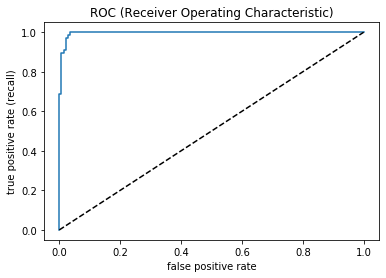

In [28]:
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
plt.show()

from the ROC curve plotted above, it is seen that once our recall rate climbs above 60% we start to get an increase in the false positive rate. This model performs very well as we can see that it is very far away from the dotted line across the centre which represents a purely random classifier.

## Feature importance

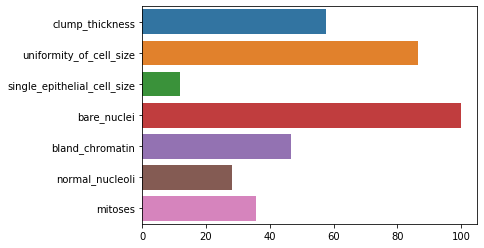

In [29]:
feature_importance = abs(log_reg2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
#feature_importance=feature_importance/feature_importance.max()*100
sns.barplot(y=X_train_new.columns, x=feature_importance)
plt.show()

# Overdispersion

This is found whereby the variance in your data is higher than the mean, whilst the Poisson distribution has variance equal to the mean.


# Conclusion
the perfomance of the model is really impressive for predicting whether a patient has cancer or not. It will correctly do so about 96% of the time. This is a tool even medical practitioners may even use to speed up the process of diagnosing patients. Hopefully using other models we can push it up to 99% accuracy.